In [10]:
%load_ext notexbook

The notexbook extension is already loaded. To reload it, use:
  %reload_ext notexbook


In [11]:
%texify

In [12]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
%autoreload 2

In [14]:
import numpy as np

In [15]:
import matplotlib.pyplot as plt

%matplotlib widget

In [17]:
from bins import Hist, Bin

In [18]:
histogram_21l = Hist('data/largedrum_21L_dense_MedianCut_3cmVoxel_all.discriminator.root')
histogram_bitumen = Hist(infile='data/largedrum_onlybitumen_dense_newmetrics_3cmVoxel_April2021.discriminator.root')
histogram_hydrogen = Hist(infile='data/largedrum_onlyhydrogen_dense_newmetrics_3cmVoxel_April2021.discriminator.root')

In [22]:
drum_21l =  histogram_21l.cylinder_select(threshold=290, edges_x=Bin(-400,400))
drum_bitumen = histogram_bitumen.cylinder_select(threshold=290, edges_x=Bin(-400,400))
drum_hydrogen = histogram_hydrogen.cylinder_select(threshold=290, edges_x=Bin(-400,400))
drum_21l_hydr = histogram_21l.cylinder_select(threshold=90, edges_x=Bin(-90,90))

In [21]:
d_h = drum_hydrogen.distance_pt(pt=(0,0,0))
d_b = drum_bitumen.distance_pt(pt=(0,0,0))
d_21l = drum_21l.distance_pt(pt=(0,0,0))
d_21l = drum_21l.distance_pt(pt=(0,0,0))
d_21l_h = drum_21l_hydr.distance_pt(pt=(0,0,0))

IndexError: index 28 is out of bounds for axis 0 with size 28

In [115]:
bins = np.linspace(15, 300, 20)

In [116]:
bin_edges = np.asarray([Bin(l, r) for l, r in zip(bins[:-1], bins[1:])])

In [117]:
bin_edges

array([Bin(left=15.0, right=30.0), Bin(left=30.0, right=45.0),
       Bin(left=45.0, right=60.0), Bin(left=60.0, right=75.0),
       Bin(left=75.0, right=90.0), Bin(left=90.0, right=105.0),
       Bin(left=105.0, right=120.0), Bin(left=120.0, right=135.0),
       Bin(left=135.0, right=150.0), Bin(left=150.0, right=165.0),
       Bin(left=165.0, right=180.0), Bin(left=180.0, right=195.0),
       Bin(left=195.0, right=210.0), Bin(left=210.0, right=225.0),
       Bin(left=225.0, right=240.0), Bin(left=240.0, right=255.0),
       Bin(left=255.0, right=270.0), Bin(left=270.0, right=285.0),
       Bin(left=285.0, right=300.0)], dtype=object)

In [118]:
count_h, b_h = np.histogram(d_h.distance, bins=bins)
idx_h = np.digitize(d_h.distance, bins=b_h, right=True)

count_b, b_b = np.histogram(d_b.distance, bins=bins)
idx_b = np.digitize(d_b.distance, bins=b_b, right=True)

count_21l, b_21l = np.histogram(d_21l.distance, bins=bins)
idx_21l = np.digitize(d_21l.distance, bins=b_21l, right=True)

count_21l_h, b_21l_h = np.histogram(d_21l_h.distance, bins=bins)
idx_21l_h = np.digitize(d_21l_h.distance, bins=b_21l_h, right=True)

In [119]:
def find_t(distr_1, distr_2):
    mean_1 = np.mean(distr_1)
    mean_2 = np.mean(distr_2)
    #print(mean_1, mean_2)
    t = np.mean([mean_2, mean_1])
    return t

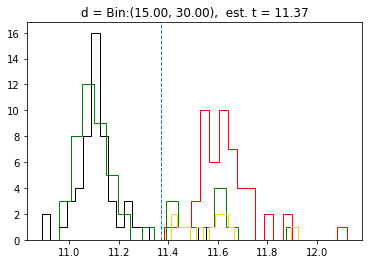

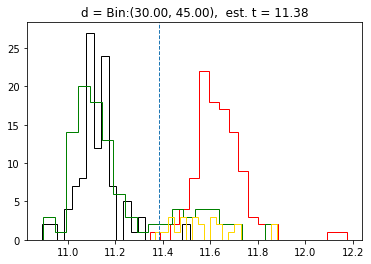

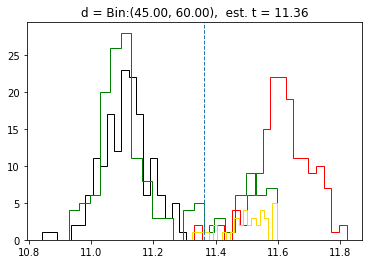

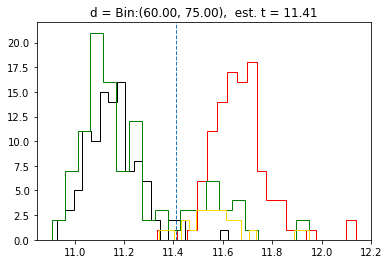

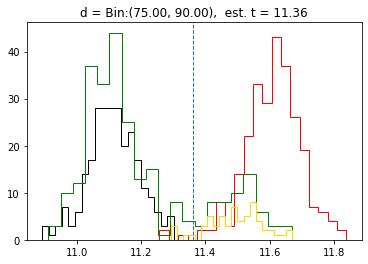

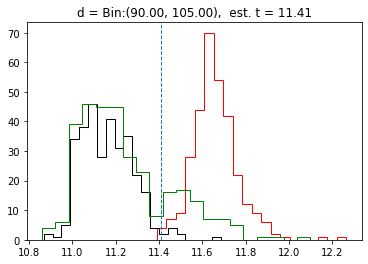

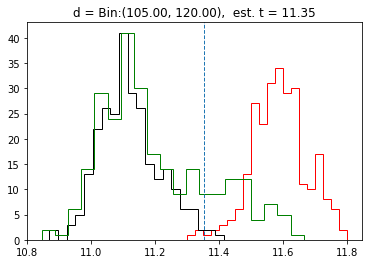

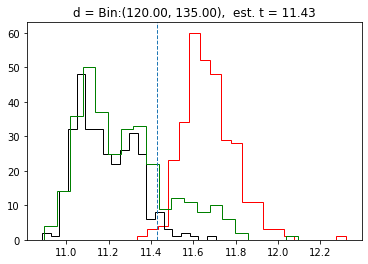

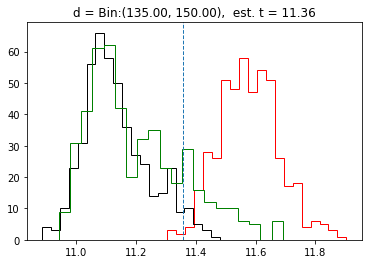

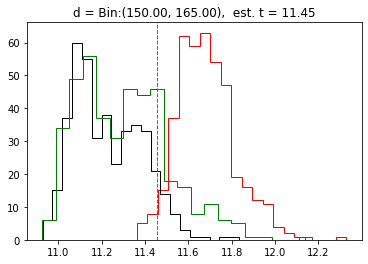

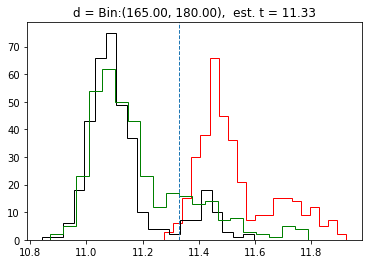

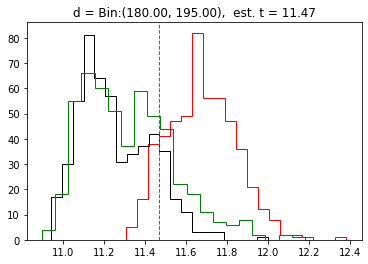

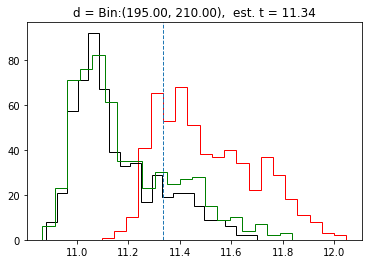

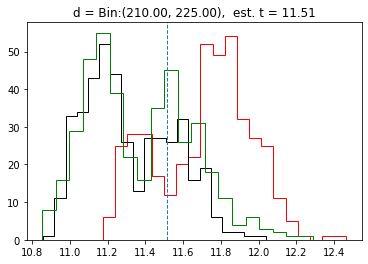

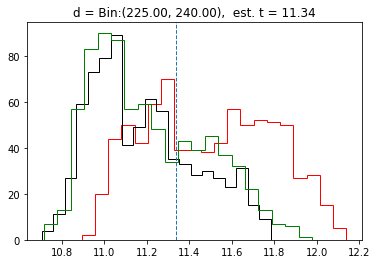

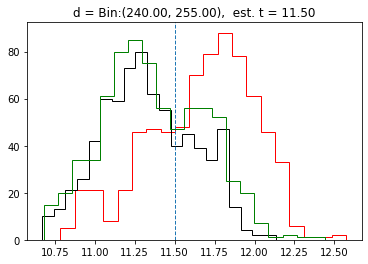

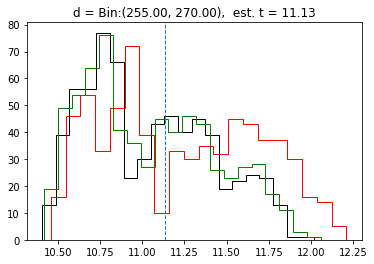

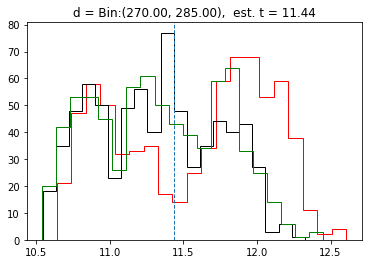

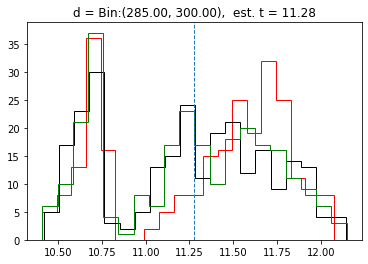

In [120]:
ts = []
for i in np.unique(idx_h):
    plt.figure()
    distr_h = d_h.median[np.where(idx_h==i)]
    distr_b = d_b.median[np.where(idx_b==i)]
    distr_21l = d_21l.median[np.where(idx_21l==i)]
    distr_21l_h = d_21l_h.median[np.where(idx_21l_h==i)]
    plt.hist(distr_h, edgecolor='red', histtype= u'step', bins=20)
    plt.hist(distr_b, edgecolor='k', histtype= u'step', bins=20)
    plt.hist(distr_21l, edgecolor='green', histtype= u'step', bins=20)
    if len(distr_21l_h)>0:
        plt.hist(distr_21l_h, edgecolor='gold', histtype=u'step', bins=20)
    t = find_t(distr_h, distr_b)
    ts.append(t)
    plt.axvline(x = t, linestyle='--', linewidth=1)
    plt.title('d = Bin:({:.2f}, {:.2f}),  est. t = {:.2f}'.format(bin_edges[i-1].left,bin_edges[i-1].right, t))
    plt.show()

In [121]:
np.unique(idx_h)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [122]:
ts = []
for i in np.unique(idx_h):
    distr_h = d_h.median[np.where(idx_h==i)]
    distr_b = d_b.median[np.where(idx_b==i)]
    distr_21l = d_21l.median[np.where(idx_21l==i)]
    distr_21l_h = d_21l_h.median[np.where(idx_21l_h==i)]
    t = find_t(distr_h, distr_b)
    print(i, t, bin_edges[i-1])
    ts.append(t)
ts = np.asarray(ts)

1 11.37237 Bin(left=15.0, right=30.0)
2 11.383484 Bin(left=30.0, right=45.0)
3 11.362829 Bin(left=45.0, right=60.0)
4 11.411325 Bin(left=60.0, right=75.0)
5 11.361368 Bin(left=75.0, right=90.0)
6 11.409951 Bin(left=90.0, right=105.0)
7 11.354243 Bin(left=105.0, right=120.0)
8 11.430184 Bin(left=120.0, right=135.0)
9 11.356508 Bin(left=135.0, right=150.0)
10 11.453635 Bin(left=150.0, right=165.0)
11 11.330235 Bin(left=165.0, right=180.0)
12 11.468952 Bin(left=180.0, right=195.0)
13 11.335208 Bin(left=195.0, right=210.0)
14 11.513633 Bin(left=210.0, right=225.0)
15 11.339232 Bin(left=225.0, right=240.0)
16 11.500191 Bin(left=240.0, right=255.0)
17 11.134762 Bin(left=255.0, right=270.0)
18 11.437215 Bin(left=270.0, right=285.0)
19 11.275888 Bin(left=285.0, right=300.0)


In [123]:
bin_edges

array([Bin(left=15.0, right=30.0), Bin(left=30.0, right=45.0),
       Bin(left=45.0, right=60.0), Bin(left=60.0, right=75.0),
       Bin(left=75.0, right=90.0), Bin(left=90.0, right=105.0),
       Bin(left=105.0, right=120.0), Bin(left=120.0, right=135.0),
       Bin(left=135.0, right=150.0), Bin(left=150.0, right=165.0),
       Bin(left=165.0, right=180.0), Bin(left=180.0, right=195.0),
       Bin(left=195.0, right=210.0), Bin(left=210.0, right=225.0),
       Bin(left=225.0, right=240.0), Bin(left=240.0, right=255.0),
       Bin(left=255.0, right=270.0), Bin(left=270.0, right=285.0),
       Bin(left=285.0, right=300.0)], dtype=object)

In [124]:
ts

array([11.37237 , 11.383484, 11.362829, 11.411325, 11.361368, 11.409951,
       11.354243, 11.430184, 11.356508, 11.453635, 11.330235, 11.468952,
       11.335208, 11.513633, 11.339232, 11.500191, 11.134762, 11.437215,
       11.275888], dtype=float32)